In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import json
import sys
import os
from matplotlib.ticker import MultipleLocator
# make paths above 'notebooks/' visible for local imports.
# +----------------------------------------------------------------------------+
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


# Load RFECV outputs

In [2]:
datadir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/feature_selection/experiment_YUF'

In [3]:
rfecv_pref = os.path.join(datadir, "rfecv*")
rfecv_results_dicts = {}
for file in glob(rfecv_pref):
    name = os.path.basename(file).split('.json')[0]
    print(name)
    with open(file) as fp:
        rfecv_results_dicts[name] = json.load(fp)

rfecv.absDist.estimators.default
rfecv.relDist.estimators.default
rfecv.relDist.estimators.tuned
rfecv.absDist.estimators.tuned
rfecv.relDist.trees
rfecv.absDist.trees


# Load RFE results for full training sets

In [4]:
rfe_pref = os.path.join(datadir, "rfe.*")
rfe_results_dicts = {}
for file in glob(rfe_pref):
    name = os.path.basename(file).split('.json')[0]
    print(name)
    with open(file) as fp:
        rfe_results_dicts[name] = json.load(fp)

rfe.full.absDist.estimators.default
rfe.full.absDist.estimators.tuned
rfe.full.relDist.estimators.default
rfe.full.relDist.estimators.tuned
rfe.full.absDist.trees
rfe.full.relDist.trees


# Plots for RFECV

In [5]:
SMALL_SIZE=8
MEDIUM_SIZE=8
LARGE_SIZE=8.5
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)  # fontsize of the figure title
plt.rc('figure', labelsize=MEDIUM_SIZE)

In [6]:
best_N_label = '$\it{n}$$_{max}$'
oste_N_label = '$\it{n}$$_{min}$'

In [31]:
def plot_R2_vs_N(results_dict, title=None, n_cols = 2, savefigname=None):
    n_dsets = len(results_dict.keys())
    n_rows = int(np.ceil(n_dsets/n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, constrained_layout=True, figsize=(n_cols*2.1, n_rows*2.5))
    axes = axes.flatten()
    for i, key in enumerate(results_dict.keys()):
        model_results = results_dict[key]
        full_score_array = model_results['N_scores']
        N_avgs = np.average(full_score_array, axis=0)
        N_min = np.min(full_score_array, axis=0)
        N_max = np.max(full_score_array, axis=0)
        N_feats_to_use = model_results['best_N']
        oste_N = model_results['oste_N']
        x = np.arange(N_avgs.shape[0])+1
        axes[i].fill_between(x, N_min, N_max, alpha=0.5, label='CV range', color='#969696')
        axes[i].scatter(x, N_avgs, label='CV avg.', s=20, color='#969696')
        axes[i].scatter(N_feats_to_use, N_avgs[N_feats_to_use-1], marker="s", color='#ca0020', label=best_N_label)
        axes[i].scatter(oste_N, N_avgs[oste_N-1], marker="x", color='#0571b0', label=oste_N_label)    
        axes[i].set_title(key, fontsize=8)
        axes[i].grid(axis='y')
        axes[i].set_ylim([0, 1.0])
        if i %  n_cols != 0:
            axes[i].set_yticklabels([])
        axes[i].xaxis.set_minor_locator(MultipleLocator(1))

    for i in np.arange(n_cols*(n_rows-1)):
        axes[i].set_xticklabels([])

    if n_cols * n_rows > n_dsets:
        for i in np.arange(n_dsets, n_rows*n_cols):
            axes[i].axis('off')

    axes[0].legend(loc='lower right')
    splabels = ['(a)', '(b)', '(c)', '(d)']
    for i, ax in enumerate(axes):
        ax.text(-0.05, 1.05, splabels[i], transform=ax.transAxes)
    fig.supxlabel("N features")
    fig.supylabel("$R^2$")
    fig.suptitle(title)
    if savefigname is not None:
        fig.savefig(savefigname, dpi=300)

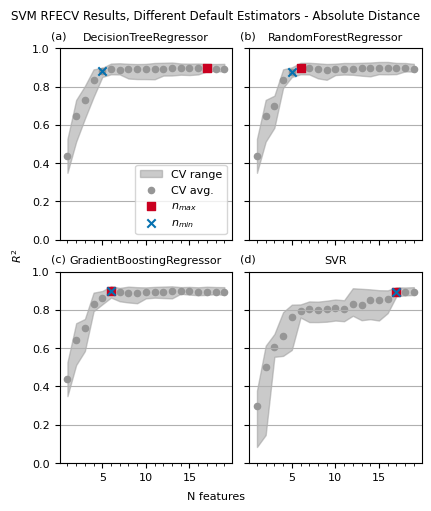

In [32]:
plot_R2_vs_N(rfecv_results_dicts['rfecv.absDist.estimators.default'], 
             title = 'SVM RFECV Results, Different Default Estimators - Absolute Distance')

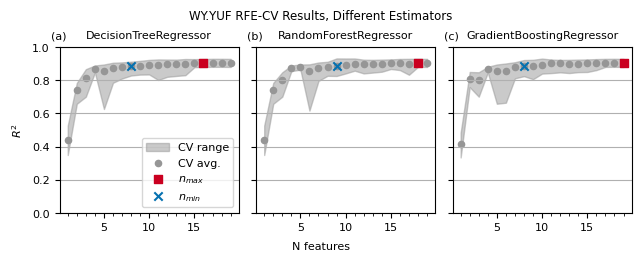

In [33]:
plot_R2_vs_N(rfecv_results_dicts['rfecv.relDist.estimators.default'], 
             title = 'WY.YUF RFE-CV Results, Different Estimators',
             n_cols=3,
             savefigname='../figures/rfeSelection_r2VN_defaults.png')

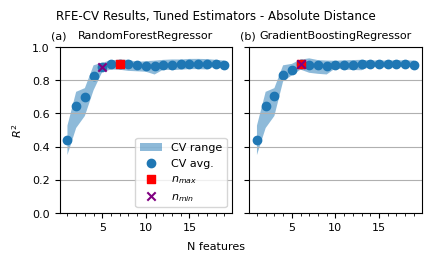

In [36]:
plot_R2_vs_N(rfecv_results_dicts['rfecv.absDist.estimators.tuned'], 
             title = 'RFE-CV Results, Tuned Estimators - Absolute Distance')

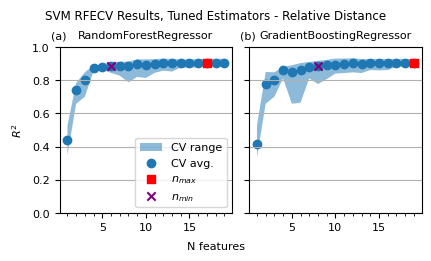

In [37]:
plot_R2_vs_N(rfecv_results_dicts['rfecv.relDist.estimators.tuned'], 
             title = 'SVM RFECV Results, Tuned Estimators - Relative Distance')

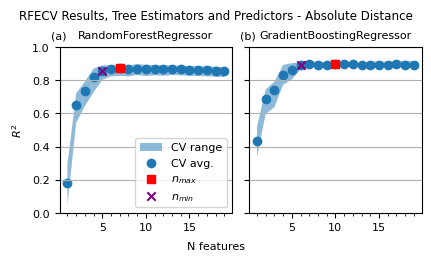

In [38]:
plot_R2_vs_N(rfecv_results_dicts['rfecv.absDist.trees'], 
             title = 'RFECV Results, Tree Estimators and Predictors - Absolute Distance')

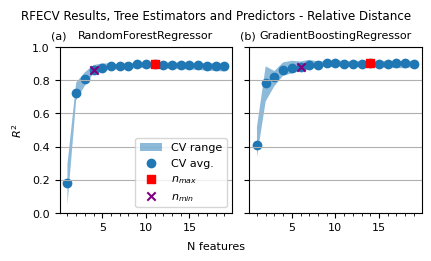

In [39]:
plot_R2_vs_N(rfecv_results_dicts['rfecv.relDist.trees'], 
             title = 'RFECV Results, Tree Estimators and Predictors - Relative Distance')

In [40]:
rfecv_results_dicts.keys()

dict_keys(['rfecv.absDist.estimators.default', 'rfecv.relDist.estimators.default', 'rfecv.relDist.estimators.tuned', 'rfecv.absDist.estimators.tuned', 'rfecv.relDist.trees', 'rfecv.absDist.trees'])

In [41]:
short_model_names = {'DecisionTreeRegressor': 'DT',
                     'RandomForestRegressor': 'RF',
                     'GradientBoostingRegressor': 'GBT',
                     'SVR':'SVR'}

short_titles = {'rfecv.absDist.estimators.default': 'SVM, Default - Abs.', 
                'rfecv.relDist.estimators.default': 'SVM, Default - Rel.', 
                'rfecv.relDist.estimators.tuned': 'SVM, Tuned - Rel.', 
                'rfecv.absDist.estimators.tuned': 'SVM, Tuned - Abs.', 
                'rfecv.relDist.trees': 'Trees, Tuned - Rel.', 
                'rfecv.absDist.trees': 'Trees, Tuned - Abs.'
}
outer_keys_order = ['rfecv.relDist.estimators.default',
                    'rfecv.absDist.estimators.default', 
                    'rfecv.relDist.estimators.tuned',
                    'rfecv.absDist.estimators.tuned', 
                    'rfecv.relDist.trees',
                    'rfecv.absDist.trees']


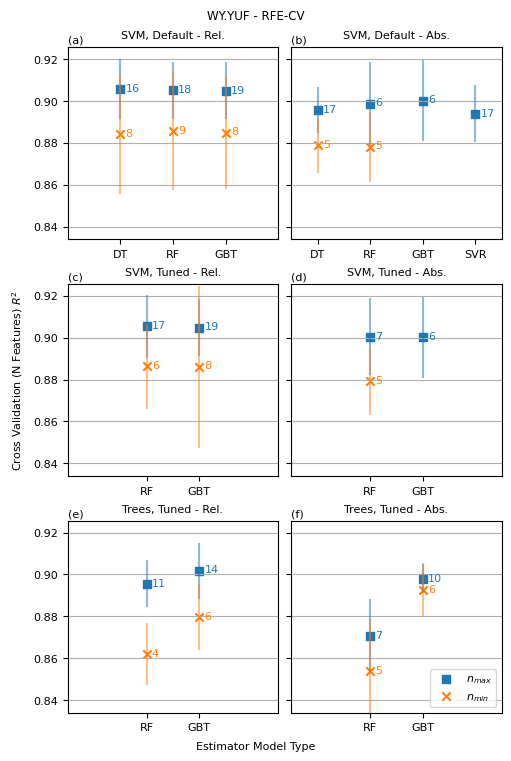

In [42]:
n_cols = 2
best_sym = 's'
oste_sym = 'x'
best_color = 'C0'
oste_color = 'C1'
n_outer_dsets = len(rfecv_results_dicts.keys())
n_rows = int(np.ceil(n_outer_dsets/n_cols))
fig, axes = plt.subplots(n_rows, n_cols, constrained_layout=True, figsize=(n_cols*2.5, n_rows*2.5))
axes = axes.flatten()

max_n_inner_dset = 0
max_score = 0
min_score = 2
for outer_key in outer_keys_order:
    outer_dict = rfecv_results_dicts[outer_key]
    n_inner_dsets = len(outer_dict.keys())
    if n_inner_dsets > max_n_inner_dset:
            max_n_inner_dset = n_inner_dsets
    for inner_key in outer_dict.keys():
        inner_dict = outer_dict[inner_key]
        if inner_dict['best_N_score'] > max_score:
             max_score = inner_dict['best_N_score'] 
        elif inner_dict['oste_N_score'] < min_score:
             min_score = inner_dict['oste_N_score']
        
for outer_k_ind, outer_key in enumerate(outer_keys_order):
    outer_dict = rfecv_results_dicts[outer_key]
    ax = axes[outer_k_ind]
    n_inner_dsets = len(outer_dict.keys())
    xtick_labels = []
    for inner_k_ind, inner_key in enumerate(outer_dict.keys()):
        label_pref = ""
        if inner_k_ind > 0:
             label_pref ="_"
        xtick_labels.append(short_model_names[inner_key])
        results = outer_dict[inner_key]
        best_N = results['best_N']
        best_N_mean = results['best_N_score']
        best_N_std = np.std(np.array(results['N_scores'])[:, best_N-1])
        ax.scatter(inner_k_ind, best_N_mean, marker=best_sym, color=best_color, label = label_pref+best_N_label)
        ax.vlines(inner_k_ind, best_N_mean-best_N_std, best_N_mean+best_N_std, color=best_color, alpha=0.5)
        ax.text(inner_k_ind+0.1, best_N_mean-0.001, best_N, color=best_color)
        oste_N = results['oste_N']
        if best_N != oste_N:
            oste_N_mean = results['oste_N_score']
            oste_N_std = np.std(np.array(results['N_scores'])[:, oste_N-1])
            ax.scatter(inner_k_ind, oste_N_mean, marker=oste_sym, color=oste_color, label=label_pref+oste_N_label)
            ax.vlines(inner_k_ind, oste_N_mean-oste_N_std, oste_N_mean+oste_N_std, color=oste_color, alpha=0.5)
            ax.text(inner_k_ind+0.1, oste_N_mean-0.001, oste_N, color=oste_color)

    ax.set_ylim([min_score-0.02, max_score+0.02])
    if outer_k_ind % n_cols > 0:
         ax.set_yticklabels([])
    ax.set_xticks(np.arange(n_inner_dsets), 
            xtick_labels,
            rotation=0)
    offset = (max_n_inner_dset - n_inner_dsets)
    if offset > 0:
         offset /= 2
    ax.set_xlim([-offset-0.5, (n_inner_dsets-1)+offset+0.5])
    ax.set_title(short_titles[outer_key])
    ax.grid(axis='y')

splabels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']
for i, ax in enumerate(axes):
     ax.text(0, 1.02, splabels[i], transform=ax.transAxes)
ax.legend(loc='lower right')
fig.supxlabel("Estimator Model Type")
fig.supylabel("Cross Validation (N Features) $R^2$")
fig.suptitle("WY.YUF - RFE-CV")
fig.savefig('../figures/rfeSelection_rfecvSummary.png', dpi=300)

# Plots for full train RFE

In [43]:
rfe_results_dicts.keys()

dict_keys(['rfe.full.absDist.estimators.default', 'rfe.full.absDist.estimators.tuned', 'rfe.full.relDist.estimators.default', 'rfe.full.relDist.estimators.tuned', 'rfe.full.absDist.trees', 'rfe.full.relDist.trees'])

In [44]:
rfe_results_dicts['rfe.full.absDist.estimators.default'].keys()

dict_keys(['DecisionTreeRegressor', 'RandomForestRegressor', 'GradientBoostingRegressor', 'SVR'])

In [45]:
rfe_results_dicts['rfe.full.absDist.estimators.default']['RandomForestRegressor'].keys()

dict_keys(['best', 'oste'])

In [46]:
rfe_results_dicts['rfe.full.absDist.estimators.default']['RandomForestRegressor']['oste']

{'selected_feature_inds': [18, 19, 24, 43, 44],
 'pred_cv_mean': 0.877057462443126,
 'pred_cv_std': 0.01693498414601668,
 'pred_cv_params': {'m__C': 10, 'm__gamma': 0.1}}

In [47]:
short_model_names = {'DecisionTreeRegressor': 'DT',
                     'RandomForestRegressor': 'RF',
                     'GradientBoostingRegressor': 'GBT',
                     'SVR':'SVR'}

short_titles = {'rfe.full.absDist.estimators.default': 'SVM, Default - Abs.', 
                'rfe.full.relDist.estimators.default': 'SVM, Default - Rel.', 
                'rfe.full.relDist.estimators.tuned': 'SVM, Tuned - Rel.', 
                'rfe.full.absDist.estimators.tuned': 'SVM, Tuned - Abs.', 
                'rfe.full.relDist.trees': 'Trees, Tuned - Rel.', 
                'rfe.full.absDist.trees': 'Trees, Tuned - Abs.'
}
outer_keys_order = ['rfe.full.relDist.estimators.default',
                    'rfe.full.absDist.estimators.default', 
                    'rfe.full.relDist.estimators.tuned',
                    'rfe.full.absDist.estimators.tuned', 
                    'rfe.full.relDist.trees',
                    'rfe.full.absDist.trees']

rfe.full.absDist.estimators.default DecisionTreeRegressor 0.8761004636359327
rfe.full.relDist.trees RandomForestRegressor 0.8622401376604006
rfe.full.absDist.trees RandomForestRegressor 0.8569529184701


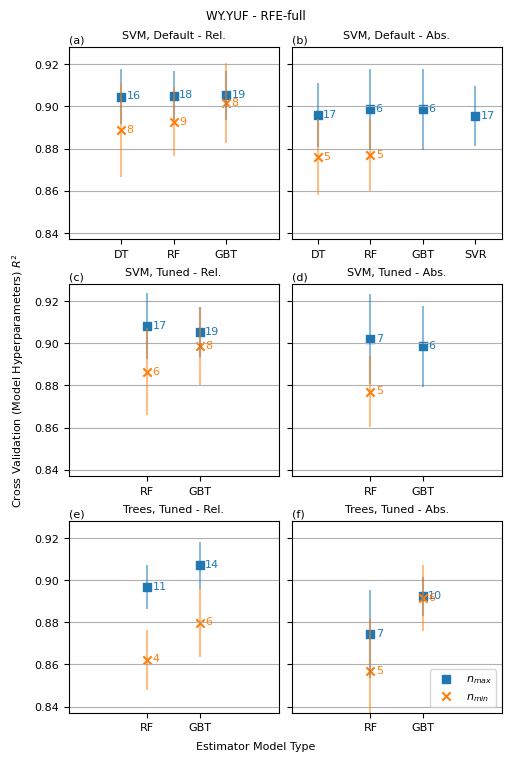

In [49]:
n_cols = 2
best_sym = 's'
oste_sym = 'x'
best_color = 'C0'
oste_color = 'C1'
n_outer_dsets = len(rfe_results_dicts.keys())
n_rows = int(np.ceil(n_outer_dsets/n_cols))
fig, axes = plt.subplots(n_rows, n_cols, constrained_layout=True, figsize=(n_cols*2.5, n_rows*2.5))
axes = axes.flatten()

max_n_inner_dset = 0
max_score = 0
min_score = 2
for outer_key in outer_keys_order:
    outer_dict = rfe_results_dicts[outer_key]
    n_inner_dsets = len(outer_dict.keys())
    if n_inner_dsets > max_n_inner_dset:
            max_n_inner_dset = n_inner_dsets
    for inner_key in outer_dict.keys():
        inner_dict = outer_dict[inner_key]
        if inner_dict['best']['pred_cv_mean'] > max_score:
             max_score = inner_dict['best']['pred_cv_mean']
        elif inner_dict['oste'] is not None and inner_dict['oste']['pred_cv_mean'] < min_score:
             min_score = inner_dict['oste']['pred_cv_mean']
             print(outer_key, inner_key, min_score)
        
for outer_k_ind, outer_key in enumerate(outer_keys_order):
    outer_dict = rfe_results_dicts[outer_key]
    ax = axes[outer_k_ind]
    n_inner_dsets = len(outer_dict.keys())
    xtick_labels = []
    for inner_k_ind, inner_key in enumerate(outer_dict.keys()):
        label_pref = ""
        if inner_k_ind > 0:
             label_pref ="_"
        xtick_labels.append(short_model_names[inner_key])
        results = outer_dict[inner_key]
        best_N = len(results['best']['selected_feature_inds'])
        best_N_mean = results['best']['pred_cv_mean']
        best_N_std = results['best']['pred_cv_std']
        ax.scatter(inner_k_ind, best_N_mean, marker=best_sym, color=best_color, label = label_pref+best_N_label)
        ax.vlines(inner_k_ind, best_N_mean-best_N_std, best_N_mean+best_N_std, color=best_color, alpha=0.5)
        ax.text(inner_k_ind+0.1, best_N_mean-0.001, best_N, color=best_color)
        oste = results['oste']
        if oste is not None:
            oste_N = len(results['oste']['selected_feature_inds'])
            oste_N_mean = results['oste']['pred_cv_mean']
            oste_N_std = results['oste']['pred_cv_std']
            ax.scatter(inner_k_ind, oste_N_mean, marker=oste_sym, color=oste_color, label=label_pref+oste_N_label)
            ax.vlines(inner_k_ind, oste_N_mean-oste_N_std, oste_N_mean+oste_N_std, color=oste_color, alpha=0.5)
            ax.text(inner_k_ind+0.1, oste_N_mean-0.001, oste_N, color=oste_color)

    ax.set_ylim([min_score-0.02, max_score+0.02])
    if outer_k_ind % n_cols > 0:
         ax.set_yticklabels([])
    ax.set_xticks(np.arange(n_inner_dsets), 
            xtick_labels,
            rotation=0)
    offset = (max_n_inner_dset - n_inner_dsets)
    if offset > 0:
         offset /= 2
    ax.set_xlim([-offset-0.5, (n_inner_dsets-1)+offset+0.5])
    ax.set_title(short_titles[outer_key])
    ax.grid(axis='y')
ax.legend(loc='lower right')

splabels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']
for i, ax in enumerate(axes):
     ax.text(0, 1.02, splabels[i], transform=ax.transAxes)
     
fig.supxlabel("Estimator Model Type")
fig.supylabel("Cross Validation (Model Hyperparameters) $R^2$")
fig.suptitle("WY.YUF - RFE-full")
fig.savefig('../figures/rfeSelection_rfefullSummary.png', dpi=300)